# - Association models to recommend more products. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns


In [2]:
data=pd.read_csv('Groceries_dataset.csv')

In [3]:
data


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

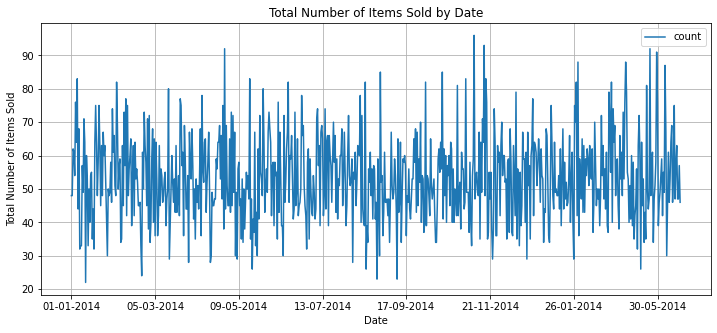

In [4]:
data.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")


In [5]:
d=data.set_index(['Date'])


In [6]:
d.index=pd.to_datetime(d.index)


In [7]:
total_items = len(d)
total_days = len(np.unique(d.index.date))
average_items = total_items / total_days
unique_items = d.itemDescription.unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days".format(total_items, total_days))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38765 items sold in 728 days
With an average of 53.24862637362637 items sold daily


In [8]:
df=data.groupby(['Member_number','Date'])['itemDescription'].apply(sum)


In [9]:
df

Member_number  Date      
1000           15-03-2015           sausagewhole milksemi-finished breadyogurt
               24-06-2014                          whole milkpastrysalty snack
               24-07-2015                           canned beermisc. beverages
               25-11-2015                              sausagehygiene articles
               27-05-2015                               sodapickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruitberriesother vegetablesyogurtkit...
               26-12-2015                                   bottled waterherbs
5000           09-03-2014                          fruit/vegetable juiceonions
               10-02-2015               sodaroot vegetablessemi-finished bread
               16-11-2014                         bottled beerother vegetables
Name: itemDescription, Length: 14963, dtype: object

In [10]:
transactions=[]
for a in list(data.groupby(['Member_number','Date'])['itemDescription']):
    transactions.append(a[1].tolist())
    
    

In [11]:
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [12]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)


In [13]:
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
pf = transactions.describe()
pf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [16]:
pf.iloc[0]-pf.iloc[3]


Instant food products      60
UHT-milk                  320
abrasive cleaner           22
artif. sweetener           29
baby cosmetics              3
                         ... 
white bread               359
white wine                175
whole milk               2363
yogurt                   1285
zwieback                   60
Length: 167, dtype: object

In [17]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)


In [18]:
item

,Count,Item
164,2363,whole milk
102,1827,other vegetables
122,1646,rolls/buns
138,1453,soda
165,1285,yogurt
123,1041,root vegetables
156,1014,tropical fruit
12,908,bottled water
130,903,sausage
30,795,citrus fruit


In [19]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(10)

Processing 28 combinations | Sampling itemset size 4e 3


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
5,0.001136,(bathroom cleaner)
6,0.033950,(beef)
7,0.021787,(berries)
8,0.016574,(beverages)
9,0.045312,(bottled beer)


In [20]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items.tail(10)

,support,itemsets,length
740,0.011161,"(whole milk, yogurt)",2
741,0.001136,"(rolls/buns, soda, other vegetables)",3
742,0.001203,"(rolls/buns, whole milk, other vegetables)",3
743,0.001136,"(whole milk, other vegetables, soda)",3
744,0.001136,"(whole milk, yogurt, other vegetables)",3
745,0.001136,"(rolls/buns, sausage, whole milk)",3
746,0.001002,"(rolls/buns, whole milk, soda)",3
747,0.001337,"(rolls/buns, yogurt, whole milk)",3
748,0.001069,"(whole milk, sausage, soda)",3
749,0.001470,"(whole milk, sausage, yogurt)",3


In [21]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934


In [22]:
rules.sort_values('lift', ascending=False).nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1236,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
1233,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
1232,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
1237,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
474,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
475,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
1234,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1235,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596
619,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118
618,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969


In [36]:
rules.sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1234,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1208,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
1228,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
1109,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008
1220,"(rolls/buns, yogurt)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701
...,...,...,...,...,...,...,...,...,...
958,(whole milk),(pasta),0.157923,0.008087,0.001069,0.006771,0.837316,-0.000208,0.998675
654,(whole milk),(frozen fish),0.157923,0.006817,0.001069,0.006771,0.993287,-0.000007,0.999954
1218,(whole milk),"(rolls/buns, soda)",0.157923,0.008087,0.001002,0.006348,0.784984,-0.000275,0.998250
982,(whole milk),(pickled vegetables),0.157923,0.008955,0.001002,0.006348,0.708829,-0.000412,0.997376


"""
Apriori algorithm is the most popular algorithm for mining association rules. 
It finds the most frequent combinations in a database and identifies association rules between the items,
based on 3 important factors:

1.Support: the probability that X and Y come together

2.Confidence: the conditional probability of Y knowing x. In other words, how often does Y happen when X happened first.

3.Lift: the ratio between support and confidence. A lift of 2 means that the likelihood of buying X and Y together is 2 times 
more than the likelihood of just buying Y.
In practice, a lift of at least 1 is necessary for a rule to be considered relevant. """

# Time series for predicting Quantities. ( FB - Prophet ) 

In [23]:
#pip install pystan
#conda install -c conda-forge fbprophet

In [24]:
import pandas as pd
import fbprophet


Importing plotly failed. Interactive plots will not work.


In [25]:
dat=pd.read_csv('Groceries_dataset.csv')

In [26]:
dat['Date']=pd.to_datetime(dat['Date'])

In [27]:
dat

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [28]:
aggr_df = dat.groupby(['Date','itemDescription'])[['Member_number']].count()

In [29]:
aggr_df['Member_number']

Date        itemDescription      
2014-01-01  Instant food products    2
            berries                  1
            bottled beer             1
            bottled water            4
            brown bread              1
                                    ..
2015-12-30  tropical fruit           1
            turkey                   1
            whipped/sour cream       1
            whole milk               3
            yogurt                   2
Name: Member_number, Length: 25231, dtype: int64

In [30]:
aggr_df.reset_index(inplace=True)

In [31]:
aggr_df

,Date,itemDescription,Member_number
0,2014-01-01,Instant food products,2
1,2014-01-01,berries,1
2,2014-01-01,bottled beer,1
3,2014-01-01,bottled water,4
4,2014-01-01,brown bread,1
...,...,...,...
25226,2015-12-30,tropical fruit,1
25227,2015-12-30,turkey,1
25228,2015-12-30,whipped/sour cream,1
25229,2015-12-30,whole milk,3


In [32]:
df = aggr_df.rename(columns={'Date': 'ds', 'Member_number':'y'})


In [33]:
df

,ds,itemDescription,y
0,2014-01-01,Instant food products,2
1,2014-01-01,berries,1
2,2014-01-01,bottled beer,1
3,2014-01-01,bottled water,4
4,2014-01-01,brown bread,1
...,...,...,...
25226,2015-12-30,tropical fruit,1
25227,2015-12-30,turkey,1
25228,2015-12-30,whipped/sour cream,1
25229,2015-12-30,whole milk,3


In [34]:
final = pd.DataFrame(columns=['itemDescription','ds','yhat'])
from fbprophet import Prophet

grouped = df.groupby('itemDescription')
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet()
    m.fit(group)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    #I added a column with client id
    forecast['itemDescription'] = g
    #I used concat instead of merge
    final = pd.concat([final, forecast], ignore_index=True)

final.head(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
INFO:fbprophet:Disabli

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:Disabling yearly seasonality. Run

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override th

ValueError: Dataframe has less than 2 non-NaN rows.

In [35]:
final.groupby(['itemDescription','ds'])[['yhat']].sum()

yhat
itemDescription       ds                  
Instant food products 2014-01-01  1.141787
                      2014-01-19  0.998501
                      2014-01-25  0.998093
                      2014-01-31  0.998934
                      2014-02-03  1.165077
...                                    ...
kitchen towels        2016-10-19  1.000000
                      2016-10-20  1.000000
                      2016-10-21  1.000000
                      2016-10-22  1.000000
                      2016-10-23  1.000000

[40372 rows x 1 columns]

'''
Hence, we can check the quantities required for the item from final_dataframe to store them in our inventory.

'''